# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[68, 92, 94, ..., 46, 31, 19],
       [17, 84, 90, ..., 98, 96, 99],
       [ 9, 58, 19, ..., 49, 82,  7],
       ...,
       [39, 61, 98, ..., 12, 42, 85],
       [43, 29, 93, ..., 46, 24, 20],
       [77, 62, 61, ..., 17, 28, 19]])

In [2]:
X = np.random.randint(0, 100, size=(3, 3))
X


array([[83, 90, 43],
       [ 1, 69, 45],
       [62, 87, 51]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [3]:
cp = A.copy().transpose()  # rows -> columns
np.random.shuffle(cp)  # shuffle columns
cp.transpose()  # rows -> columns, which brings back origin orientation


array([[94, 60, 83, ..., 28, 27, 82],
       [90, 64, 34, ..., 77,  7,  1],
       [19, 36, 41, ..., 57, 80, 14],
       ...,
       [98, 51, 20, ..., 21, 40, 51],
       [93, 32, 31, ..., 51, 70,  6],
       [61, 50, 39, ..., 51, 27, 82]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [4]:
A[A[::, ::2].sum(axis=1) > A[::, 1::2].sum(axis=1).mean()]


array([[17, 84, 90, ..., 98, 96, 99],
       [ 9, 58, 19, ..., 49, 82,  7],
       [92, 32, 38, ..., 18,  6, 51],
       ...,
       [48, 86, 70, ..., 14,  0,  2],
       [55, 92, 95, ..., 48, 25,  2],
       [39, 61, 98, ..., 12, 42, 85]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [5]:
np.argmax(A.max(axis=1) - A.min(axis=1))


12

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [6]:
A.reshape(-1).argsort().argsort().reshape(A.shape)


array([[6819, 9234, 9493, ..., 4706, 3148, 1973],
       [1719, 8399, 9075, ..., 9822, 9659, 9986],
       [ 970, 5880, 1927, ..., 4926, 8223,  752],
       ...,
       [3978, 6144, 9818, ..., 1202, 4312, 8513],
       [4338, 3019, 9347, ..., 4714, 2469, 2096],
       [7761, 6219, 6157, ..., 1727, 2875, 1922]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [7]:
(A - A.min(axis=1).reshape(-1, 1)) / (A.max(axis=1) - A.min(axis=1)).reshape(-1, 1)


array([[0.72043011, 0.97849462, 1.        , ..., 0.48387097, 0.32258065,
        0.19354839],
       [0.16326531, 0.84693878, 0.90816327, ..., 0.98979592, 0.96938776,
        1.        ],
       [0.03225806, 0.55913978, 0.13978495, ..., 0.46236559, 0.8172043 ,
        0.01075269],
       ...,
       [0.39795918, 0.62244898, 1.        , ..., 0.12244898, 0.42857143,
        0.86734694],
       [0.44329897, 0.29896907, 0.95876289, ..., 0.4742268 , 0.24742268,
        0.20618557],
       [0.7755102 , 0.62244898, 0.6122449 , ..., 0.16326531, 0.2755102 ,
        0.18367347]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [8]:
np.array(range(1, 11)).reshape(10, 1, 1) * A.reshape(1, *A.shape)


array([[[ 68,  92,  94, ...,  46,  31,  19],
        [ 17,  84,  90, ...,  98,  96,  99],
        [  9,  58,  19, ...,  49,  82,   7],
        ...,
        [ 39,  61,  98, ...,  12,  42,  85],
        [ 43,  29,  93, ...,  46,  24,  20],
        [ 77,  62,  61, ...,  17,  28,  19]],

       [[136, 184, 188, ...,  92,  62,  38],
        [ 34, 168, 180, ..., 196, 192, 198],
        [ 18, 116,  38, ...,  98, 164,  14],
        ...,
        [ 78, 122, 196, ...,  24,  84, 170],
        [ 86,  58, 186, ...,  92,  48,  40],
        [154, 124, 122, ...,  34,  56,  38]],

       [[204, 276, 282, ..., 138,  93,  57],
        [ 51, 252, 270, ..., 294, 288, 297],
        [ 27, 174,  57, ..., 147, 246,  21],
        ...,
        [117, 183, 294, ...,  36, 126, 255],
        [129,  87, 279, ..., 138,  72,  60],
        [231, 186, 183, ...,  51,  84,  57]],

       ...,

       [[544, 736, 752, ..., 368, 248, 152],
        [136, 672, 720, ..., 784, 768, 792],
        [ 72, 464, 152, ..., 392, 656,  56

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [9]:
np.concatenate([A[:, ::2], A[:, 1::2]], axis=1)


array([[68, 94, 18, ..., 75, 46, 19],
       [17, 90, 82, ...,  2, 98, 99],
       [ 9, 19, 71, ..., 23, 49,  7],
       ...,
       [39, 98, 63, ..., 61, 12, 85],
       [43, 93, 53, ..., 69, 46, 20],
       [77, 61, 26, ..., 47, 17, 19]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [10]:
np.all(A > 5, axis=1).sum()


16

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [11]:
np.array(np.split(A, 10)).mean(axis=0)


array([[31.9, 51.2, 52. , 56.8, 34.9, 51. , 37.9, 35.6, 60.4, 50.7, 51.4,
        74.6, 48.2, 54. , 66.6, 38.2, 44.9, 47.6, 46.6, 54.2, 44.8, 59.8,
        54.8, 46.7, 39.5, 59.8, 54.3, 39.5, 37.6, 60.3, 59.6, 63.4, 51.9,
        41. , 44.5, 42.1, 48.6, 42.3, 41.9, 44.3, 55. , 65.6, 66.9, 42.7,
        49.3, 67. , 52.5, 46.9, 39.3, 47.9],
       [56.9, 67.9, 44.6, 39.4, 42.5, 61.3, 29.2, 56.7, 38.9, 51.2, 59.7,
        58.1, 39.9, 61.4, 43.5, 51.5, 45.4, 47.3, 49.5, 39.5, 43.4, 58. ,
        52.6, 32.9, 53.1, 60.2, 44.3, 33.3, 69. , 54.7, 58.8, 54.8, 46.6,
        50.1, 55.7, 57.6, 36.8, 47.1, 47.6, 47.1, 55.8, 41.6, 46.6, 42.4,
        36.1, 37.9, 47.3, 55.2, 58.6, 52. ],
       [37.9, 57.5, 43.7, 47.8, 43.5, 60.3, 30.7, 56.1, 52.7, 51.3, 48.6,
        45.6, 61.9, 25.1, 47.9, 47.5, 49.5, 57.6, 46.4, 33.1, 44.8, 43.5,
        42. , 49.3, 63.6, 40.2, 49.2, 55.9, 48. , 37.9, 40.8, 67.6, 41.5,
        38.4, 54.1, 62.1, 54.8, 67.5, 38.7, 53.5, 61.6, 52.1, 65.6, 59.1,
        77. , 37.4, 53

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [12]:
unique_nums, idxs = np.unique(A.reshape(-1), return_index=True)
unique_nums[idxs.argsort()]


array([68, 92, 94, 78, 18, 60, 54, 89, 69, 77, 93, 49, 83, 58, 76, 42, 27,
       56, 66, 91, 36,  1, 23,  9, 82, 84, 10, 33, 48, 81, 28, 57, 75,  6,
       46, 31, 19, 17, 90, 86, 64,  7, 85, 35, 29, 34, 51, 25, 15, 11, 38,
       21, 45, 16, 30, 67, 63, 72, 97,  5, 59,  2, 98, 96, 99, 71, 24, 32,
       39, 41, 95, 80, 20, 26, 14, 74,  3, 88,  4, 13, 37, 70, 55, 47, 52,
       87, 44, 53, 61, 65, 50, 62, 43, 73, 79, 40, 22,  8,  0, 12])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [13]:
np.linalg.norm(A - A.mean(axis=0), axis=1)


array([193.54745277, 224.31358959, 190.83630806, 223.05464908,
       179.24582694, 199.71431214, 211.24690879, 191.42350032,
       191.65992402, 189.12627124, 218.46767833, 224.07859441,
       209.88710412, 201.0797018 , 204.03917877, 195.07195205,
       202.95313862, 209.15043982, 222.95467359, 188.58389771,
       222.42137144, 217.09983067, 222.19308377, 207.74777129,
       197.07325155, 177.87087023, 197.55236388, 189.84139821,
       211.21189946, 222.36527713, 204.6026551 , 216.36990658,
       195.4830593 , 185.93132193, 210.08487922, 212.00591142,
       202.98272457, 197.4766226 , 200.04898519, 189.7222087 ,
       220.57279178, 195.50234391, 206.17848209, 204.24545644,
       206.65946984, 212.8149348 , 209.18402538, 189.16803767,
       194.45240157, 184.92551602, 201.04513542, 216.96372156,
       195.05406039, 212.68551073, 210.38067039, 212.4405481 ,
       199.44286519, 211.86749745, 207.84765208, 234.90065235,
       193.10514357, 223.35856034, 200.20508604, 190.59

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [14]:
X = np.where(A < 50, A, A * 2)
X = np.where(A >= 50, X, X * 3)
X

array([[136, 184, 188, ..., 138,  93,  57],
       [ 51, 168, 180, ..., 196, 192, 198],
       [ 27, 116,  57, ..., 147, 164,  21],
       ...,
       [117, 122, 196, ...,  36, 126, 170],
       [129,  87, 186, ..., 138,  72,  60],
       [154, 124, 122, ...,  51,  84,  57]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [15]:
def moving_average(a, n):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1 :] / n


(
    moving_average(A.reshape(-1), 3)
    + np.concatenate([moving_average(A.reshape(-1), 5), np.zeros(2)])
    + np.concatenate([moving_average(A.reshape(-1), 10), np.zeros(7)])
)


array([218.66666667, 221.3       , 181.93333333, ...,  47.26666667,
        17.33333333,  21.33333333])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

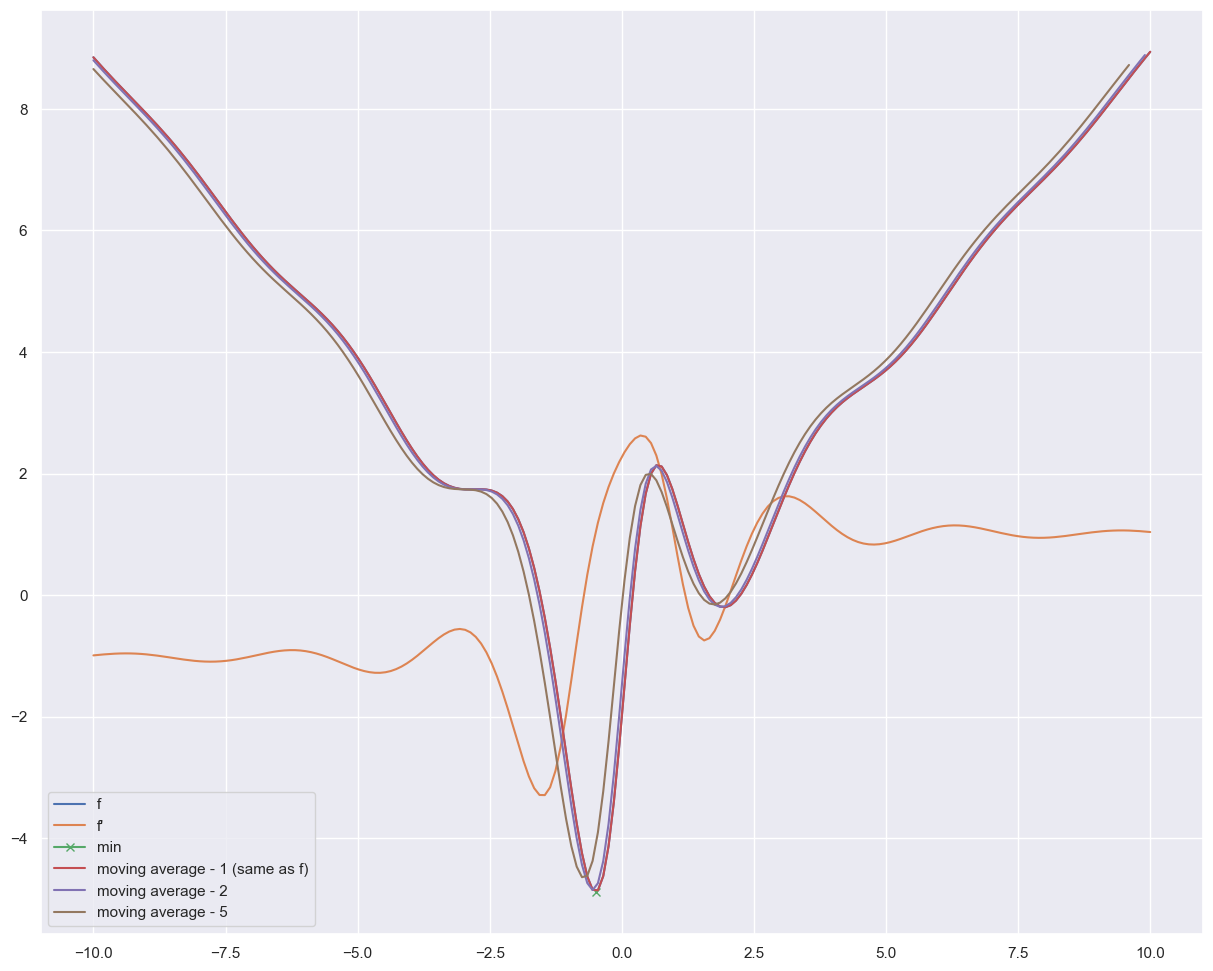

In [16]:
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import minimize


def f(x):
    return (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x**3) - x**2) / (
        x**2 + 1
    )

info = minimize(f, x0=-1)
y_min = info['fun']
x_min = info['x'][0]

x = np.linspace(-10, 10, 200)
y = f(x)

figure = plt.figure(figsize=(15, 12))

plt.plot(x, y, label='f')
plt.plot(x, derivative(f, x), label="f'")
plt.plot(x_min, y_min, marker='x', label='min')
plt.plot(x, moving_average(y, 1), label='moving average - 1 (same as f)')
plt.plot(x[:-1], moving_average(y, 2), label='moving average - 2')
plt.plot(x[:-4], moving_average(y, 5), label='moving average - 5')
plt.legend()
plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [17]:
def sample(x: list[int], c: int) -> list[int]:
    assert len(x) > 0

    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1

        res.append(idx)
    return res


sample([50, 3, 1, 7, 20], 5)


[0, 0, 0, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [18]:
import numpy.typing as npt
import toolz


def np_sample(x: npt.NDArray[np.int64], c: int) -> npt.NDArray[np.int64]:
    """`numpy`-powered sampling.

    Args:
        x (npt.NDArray[np.int64]): vector.
        c (int): number of sample.

    Returns:
        npt.NDArray[np.int64]: selected indexes.
    """
    # assert is unsafe
    # see: https://bandit.readthedocs.io/en/latest/plugins/b101_assert_used.html
    if len(x) <= 0:
        raise ValueError("Vector length is less than 0", len(x))

    random_values = np.random.rand(c) * x.sum()
    random_values = random_values.reshape(-1, 1)
    
    cumsums = np.cumsum(x).reshape(1, -1)
    cumsums = np.repeat(cumsums, c, axis=0)

    mask = cumsums < random_values
    return mask.sum(axis=1)

np_sample(np.array([50, 3, 1, 7, 20]), 5)

array([0, 0, 0, 4, 4])

In [21]:
x = np.random.randint(0, 100, size=(1_000,))
c = 1_000

In [22]:
%%timeit
s_default = sample(x, c) # type:ignore

455 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
s_np = np_sample(x, c)

2.32 ms ± 52.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot: ylabel='Count'>

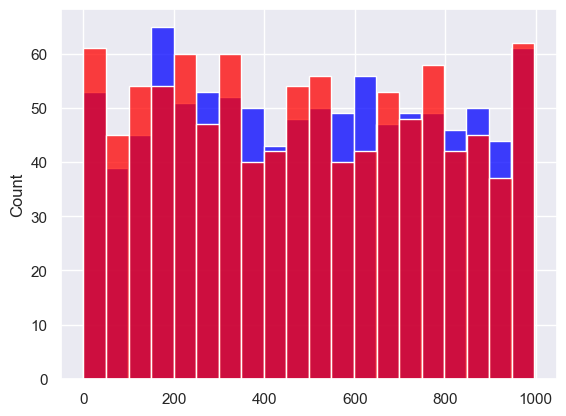

In [24]:
s_default = sample(x, c)  # type:ignore
s_np = np_sample(x, c)
sns.histplot(s_np, color='blue', bins=20)  # type: ignore
sns.histplot(s_default, color='red', bins=20)  # type: ignore


<AxesSubplot: ylabel='Count'>

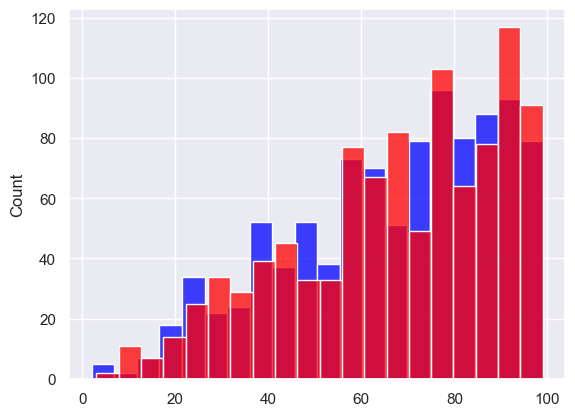

In [25]:
sns.histplot(x[s_np], color="blue", bins=20)  # type: ignore
sns.histplot(x[s_default], color="red", bins=20)  # type: ignore


Samples seem to be pretty similar. Let's check it with `ttest_ind` with $\alpha
= 0.05$. We use `ttest_ind` as it is used for checking null hypothesis that 2
independent samples have identical average values.

See [manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

In [26]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(s_default, s_np)
print(f"{stat=:.3f}, {p=:.3f}")

stat=-0.862, p=0.389


According to `p-value` we can't reject null hypothesis.

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [27]:
import random


def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position


walk(10_000)


2046

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

In [28]:
def np_walk(n: int):
    return np.random.choice([-3, -1, 0, 2, 3], size=n).sum()

In [29]:
%%timeit
walk(100_000)

29.6 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%%timeit
np_walk(100_000)

1.15 ms ± 8.89 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [31]:
np_walk_ufunc = np.frompyfunc(np_walk, 1, 1)
walk_ufunc = np.frompyfunc(walk, 1, 1)
np_res =np_walk_ufunc(np.random.randint(10_000, 10_001, size=(10_000,)))
_res = walk_ufunc(np.random.randint(10_000, 10_001, size=(10_000,)))

<AxesSubplot: ylabel='Density'>

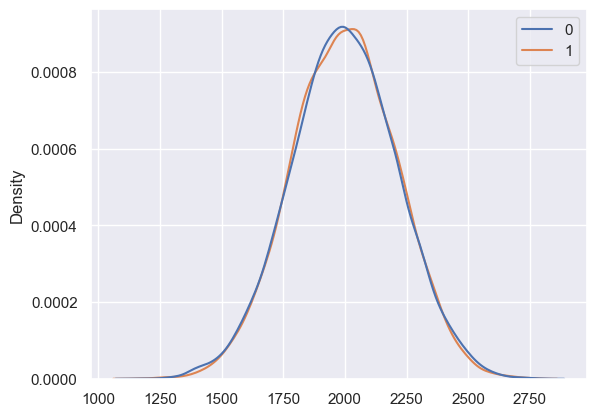

In [32]:
sns.kdeplot([np_res, _res])

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [33]:
import numpy.typing as npt


def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.0
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y + 1, x + 2] - a[y + 5, x + 3] * a[y, x] + 0.2 * a[y + 4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.34806555107676046

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [34]:
# !poetry add numba@0.55.2
%pip install numba==0.55.2

Note: you may need to restart the kernel to use updated packages.


In [38]:
import numba

numba_strange_conv = numba.jit(nopython=True)(strange_conv)

In [36]:
%%timeit
strange_conv(a)

6.87 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%%timeit
numba_strange_conv(a)

28.2 ms ± 281 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
!poetry add Cython

Using version ^0.29.33 for cython

Updating dependencies
Resolving dependencies... (1.0s)s://files.pythonhosted.org/packages/56/3a/e59db3769dee48409c759a88b62cd605324e05d396e10af0a065adc956ad/Cython-0.29.33-py2.py3-none-any.whl (0.5s)

Writing lock file

Package operations: 1 install, 1 update, 0 removals

  • Updating numpy (1.22.4 -> 1.23.5): Pending...
  • Updating numpy (1.22.4 -> 1.23.5): Installing...
  • Updating numpy (1.22.4 -> 1.23.5)
  • Installing cython (0.29.33): Pending...
  • Installing cython (0.29.33): Downloading... 0%
  • Installing cython (0.29.33): Downloading... 30%
  • Installing cython (0.29.33): Downloading... 100%
  • Installing cython (0.29.33): Installing...
  • Installing cython (0.29.33)


In [47]:
%load_ext Cython

In [54]:
%%cython -a

import numpy.typing as npt
import numpy as np


def cython_strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.0
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y + 1, x + 2] - a[y + 5, x + 3] * a[y, x] + 0.2 * a[y + 4, x]
            t = 0.2 * t + 0.8 * c

    return t

In [60]:
%%timeit
cython_strange_conv(a)

5.87 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Cython seems to highly rely on provided data types.